In [ ]:
!pip install -q kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thirupathiburra","key":"f7ea6e4b1cd716b9ab4329ba38727dc8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 96% 632M/658M [00:03<00:00, 140MB/s]
100% 658M/658M [00:03<00:00, 188MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/plantdisease.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()


In [ ]:
import os

base_dir = '/content/PlantVillage'
print("Classes:", os.listdir(base_dir))

Classes: ['Potato___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Pepper__bell___healthy', 'Tomato_Early_blight', 'Pepper__bell___Bacterial_spot', 'Tomato_healthy']


Available classes: ['Potato___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Leaf_Mold', 'Potato___Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato__Tomato_mosaic_virus', 'Pepper__bell___healthy', 'Tomato_Early_blight', 'Pepper__bell___Bacterial_spot', 'Tomato_healthy']
Showing samples from: Tomato_Spider_mites_Two_spotted_spider_mite


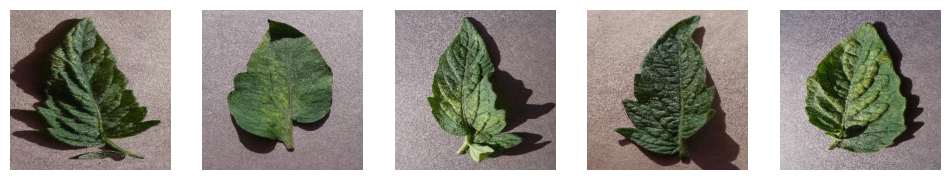

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Pick a random class
classes = os.listdir(base_dir)
print("Available classes:", classes)

random_class = random.choice(classes)
print("Showing samples from:", random_class)

sample_dir = os.path.join(base_dir, random_class)
sample_images = os.listdir(sample_dir)

plt.figure(figsize=(12, 6))
for i in range(5):
    img = mpimg.imread(os.path.join(sample_dir, sample_images[i]))
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

print("Classes found:", train_generator.class_indices)
print(f"Training samples: {train_generator.samples}")
print(f"Validation samples: {validation_generator.samples}")

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.
Classes found: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}
Training samples: 16516
Validation samples: 4122


In [ ]:
# 📌 Starter Disease Info Mapping

disease_info = {
    "Apple___Apple_scab": {
        "description": "Apple scab is a common fungal disease caused by Venturia inaequalis. It appears as dark, scabby lesions on leaves and fruit.",
        "treatment": "Prune infected parts, use fungicide sprays, maintain proper orchard sanitation."
    },
    "Apple___Black_rot": {
        "description": "Black rot is caused by Botryosphaeria obtusa. It affects fruit, leaves, and limbs, causing rotting and leaf spots.",
        "treatment": "Remove mummified fruit, prune infected branches, apply fungicide before blooming."
    },
    "Apple___Cedar_apple_rust": {
        "description": "Cedar apple rust is a fungal disease that needs both apple and cedar trees to complete its lifecycle.",
        "treatment": "Remove nearby cedar hosts if possible, apply fungicide during early leaf stages."
    },
    "Apple___healthy": {
        "description": "Healthy apple leaf with no signs of disease or pest damage.",
        "treatment": "No treatment needed. Maintain good orchard practices to prevent disease."
    },
    "Tomato___Late_blight": {
        "description": "Late blight is caused by the water mold Phytophthora infestans. It is known for rapidly destroying tomato crops.",
        "treatment": "Remove infected plants immediately, avoid wet foliage, apply fungicides proactively."
    },
    "Tomato___Leaf_Mold": {
        "description": "Leaf mold is a fungal disease caused by Passalora fulva. It appears as yellow spots on upper leaf surfaces with mold underneath.",
        "treatment": "Improve air circulation, avoid overhead watering, use resistant varieties and fungicide if needed."
    },
    "Tomato___healthy": {
        "description": "Healthy tomato leaf with no signs of blight, mold, or pests.",
        "treatment": "No treatment needed. Practice crop rotation and regular monitoring."
    },
    "Potato___Early_blight": {
        "description": "Early blight in potatoes is caused by Alternaria solani. Dark concentric leaf spots are typical.",
        "treatment": "Use certified disease-free seed, remove infected leaves, apply fungicide early in the season."
    },
    "Potato___Late_blight": {
        "description": "Late blight in potatoes is the same disease that caused the Irish potato famine. Caused by Phytophthora infestans.",
        "treatment": "Destroy infected plants, rotate crops, use resistant varieties, apply fungicides early."
    },
    "Potato___healthy": {
        "description": "Healthy potato leaf with no signs of early or late blight.",
        "treatment": "No treatment needed. Maintain field hygiene and regular inspections."
    }
}

# ✅ Confirm sample
print("Example:", disease_info["Apple___Black_rot"])

Example: {'description': 'Black rot is caused by Botryosphaeria obtusa. It affects fruit, leaves, and limbs, causing rotting and leaf spots.', 'treatment': 'Remove mummified fruit, prune infected branches, apply fungicide before blooming.'}


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze all base layers
for layer in base_model.layers:
    layer.trainable = False

base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,849,871 (56.65 MB)

 Trainable params: 135,183 (528.06 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stop]
)

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 134s 247ms/step - accuracy: 0.8471 - loss: 0.5004 - val_accuracy: 0.9353 - val_loss: 0.2037
Epoch 2/20
  1/516 ━━━━━━━━━━━━━━━━━━━━ 1:37 190ms/step - accuracy: 0.9375 - loss: 0.2567

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9375 - loss: 0.2567 - val_accuracy: 0.9353 - val_loss: 0.2054
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 142s 276ms/step - accuracy: 0.9320 - loss: 0.2000 - val_accuracy: 0.9534 - val_loss: 0.1427
Epoch 4/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 22s 43ms/step - accuracy: 0.9062 - loss: 0.3364 - val_accuracy: 0.9517 - val_loss: 0.1516
Epoch 5/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 161s 240ms/step - accuracy: 0.9539 - loss: 0.1365 - val_accuracy: 0.9109 - val_loss: 0.2703
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.8750 - loss: 0.2290 - val_accuracy: 0.9167 - val_loss: 0.2554
Epoch 7/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 142s 275ms/step - accuracy: 0.9661 - loss: 0.1046 - val_accuracy: 0.9509 - val_loss: 0.1627
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9688 - loss: 0.0838 - val_accuracy: 0.9568 - val_loss: 0.1473


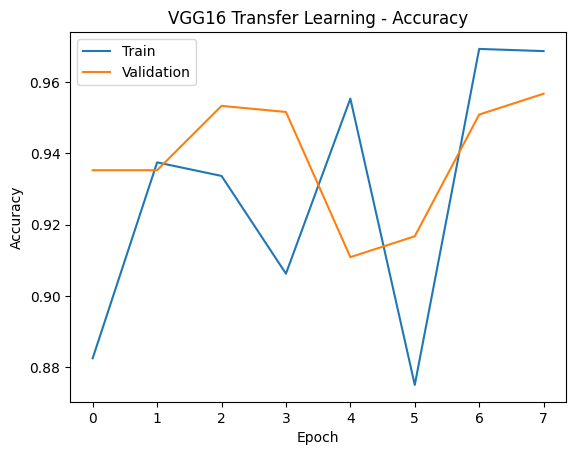

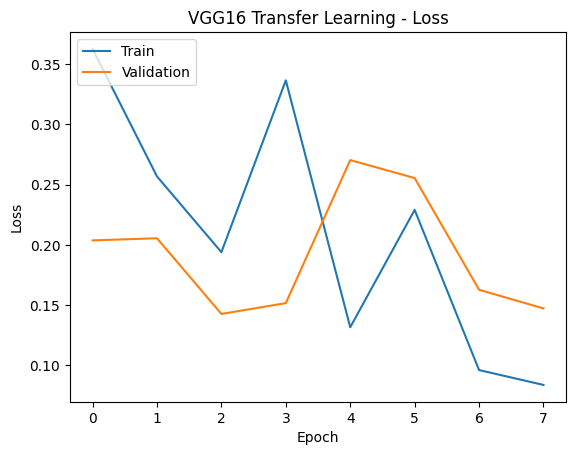

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Transfer Learning - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Transfer Learning - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Unfreeze the last 4 convolutional layers
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Re-compile with a lower LR
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stop]
)

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 151s 242ms/step - accuracy: 0.9762 - loss: 0.0723 - val_accuracy: 0.9675 - val_loss: 0.1045
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 1.0000 - loss: 0.0369 - val_accuracy: 0.9668 - val_loss: 0.1072
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 142s 275ms/step - accuracy: 0.9847 - loss: 0.0520 - val_accuracy: 0.9712 - val_loss: 0.0935
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 1.0000 - loss: 0.0130 - val_accuracy: 0.9712 - val_loss: 0.0939
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 125s 243ms/step - accuracy: 0.9890 - loss: 0.0390 - val_accuracy: 0.9731 - val_loss: 0.0946
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9688 - loss: 0.0300 - val_accuracy: 0.9724 - val_loss: 0.0955
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 160s 240ms/step - accuracy: 0.9906 - loss: 0.0330 - val_accuracy: 0.9753 - val_loss: 0.0870
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9688 - loss: 0

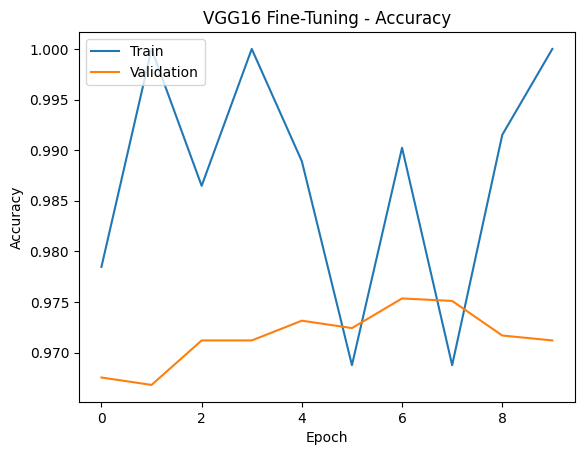

In [ ]:
plt.plot(history_finetune.history['accuracy'])
plt.plot(history_finetune.history['val_accuracy'])
plt.title('VGG16 Fine-Tuning - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Save model weights to Google Drive after training
model.save('//content/drive/MyDrive/Colab Notebooks/EL_Project/plant_disease_model.keras')

In [2]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/EL_Project/plant_disease_model.keras')

In [4]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/EL_Project/plant_disease_model.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Representative data generator for dynamic range calibration
def representative_dataset_gen():
    for _ in range(100):
        # Replace with real sample inputs from your data if possible
        yield [tf.random.uniform(shape=(1, *model.input_shape[1:]), dtype=tf.float32)]

converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_quant_model = converter.convert()
with open("plant_disease_model_int8.tflite", "wb") as f:
    f.write(tflite_quant_model)


Saved artifact at '/tmp/tmpxkdc4l0o'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  139767834352848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638873424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638881488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638883600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638873808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638882832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638883408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638882064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638882640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139767638876880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13976763888187

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:997: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img_path = '/content/PlantVillage/Tomato_Early_blight/0012b9d2-2130-4a06-a834-b1f3af34f57e___RS_Erly.B 8389.JPG'

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize


In [ ]:
preds = model.predict(img_array)
predicted_class = np.argmax(preds[0])
print(f"Predicted Class Index: {predicted_class}")

class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}
print(f"Predicted Label: {idx_to_class[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class Index: 6
Predicted Label: Tomato_Early_blight


In [ ]:
for i, layer in enumerate(model.layers):
    try:
        print(i, layer.name, layer.output.shape)
    except AttributeError:
        # InputLayer doesn't have .output, but its input_shape can be accessed
        if hasattr(layer, 'input_shape'):
             print(i, layer.name, layer.input_shape)
        else:
             print(i, layer.name, "No shape information available")

0 input_layer (None, 224, 224, 3)
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 global_average_pooling2d (None, 512)
20 dense (None, 256)
21 dropout (None, 256)
22 dense_1 (None, 15)


In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        # Pass the img_array as a list to match the expected input structure
        conv_outputs, predictions = grad_model([img_array])
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()

In [ ]:
last_conv_layer_name = 'block5_conv3'  # for VGG16

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['input_layer']]
Received: inputs=['Tensor(shape=(1, 224, 224, 3))']
  warnings.warn(msg)


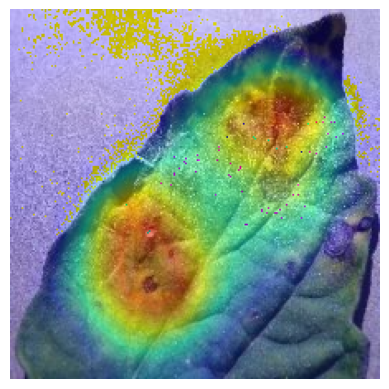

In [ ]:
import cv2

img_orig = cv2.imread(img_path)
img_orig = cv2.resize(img_orig, (224, 224))

heatmap_resized = cv2.resize(heatmap, (img_orig.shape[1], img_orig.shape[0]))
heatmap_resized = np.uint8(255 * heatmap_resized)
heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

# Superimpose
superimposed_img = heatmap_color * 0.4 + img_orig

# Save
cv2.imwrite('gradcam_result.jpg', superimposed_img[:, :, ::-1])  # BGR to RGB if needed

# Display
plt.imshow(cv2.cvtColor(superimposed_img.astype('uint8'), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Get true labels & predicted labels for the entire validation set
Y_true = []
Y_pred = []

for i in range(len(validation_generator)):
    X_batch, y_batch = validation_generator[i]
    Y_true.extend(np.argmax(y_batch, axis=1))
    preds = model.predict(X_batch)
    Y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━